In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Linear Algebra

The study of linear sets of equations and their transformation properties. It allows the analysis of rotations in space, least squares fitting, solution of coupled differential equations and such.

In [3]:
x = np.array([[1,3,1], 
              [1,0,0]])

In [4]:
y = np.array([[0,0],
             [7,5],
             [1,1]])

In [7]:
print(x.shape)

(2, 3)


In [8]:
print(y.shape)

(3, 2)


### Basic Operations
#### Matrix Addition
an operation which sums together matrices of the same dimension.

In [9]:
arr_1 = np.array([[2,1,1], 
                  [1,2,3]])

arr_2 = np.array([[0,2,3], 
                  [4,0,0]])

arr_3 = np.array([[5,1,5],
                  [4,3,2]])

In [10]:
arr_1 + arr_2

array([[2, 3, 4],
       [5, 2, 3]])

In [12]:
try:
    x + y
except:
    print('can only add matrices if their dimensions are the same')

can only add matrices if their dimensions are the same


#### Commutative Property (交換法則)
```
x + y = y + x
```

In [13]:
arr_1 + arr_2 == arr_2 + arr_1

array([[ True,  True,  True],
       [ True,  True,  True]])

#### Associative Property (結合法則)
```
(x + y) + z = x + (y + z)
```

In [14]:
(arr_1 + arr_2) + arr_3 == arr_1 + (arr_2 + arr_3)

array([[ True,  True,  True],
       [ True,  True,  True]])

#### Visualizing Matrix Addition

In [15]:
v1 = np.array([4,4])
v2 = np.array([-1,-2])

AttributeError: module 'numpy' has no attribute 'arrange'

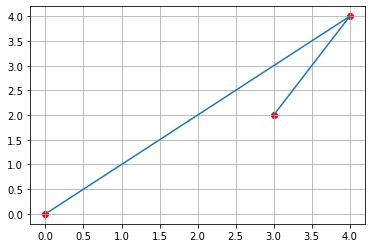

In [16]:
# plot points
plt.scatter([0, v1[0], v1[0] + v2[0]],[0, v1[1], v1[1] + v2[1]], color = 'red')
# plot line
plt.plot([0, v1[0], v1[0] + v2[0]], [0, v1[1], v1[1] + v2[1]])

plt.grid()
plt.xticks(np.arrange(-2, 7, 1))
plt.yticks(np.arrange(-2, 7, 1))
plt.axvline(x=0, color = 'black')
plt.axhline(y=0, color = 'black')
plt.title("Matrix Addition")